<a href="https://colab.research.google.com/github/pkpk1717/MNIST-digit-recognition-using-Keras/blob/master/1st_DNN_completed_99_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


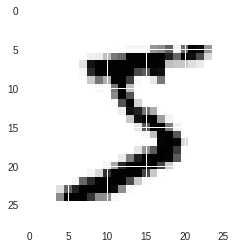

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
Y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [14]:
from keras.layers import Activation
model = Sequential()


# model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(28,28,1)))
# # model.add(Convolution2D(10, 1, activation='relu'))
# # model.add(Convolution2D(10, 26))
# model.add(Convolution2D(256,3,3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Convolution2D(512,3,3, activation='relu'))
# model.add(Convolution2D(1024,3,3, activation='relu'))
# model.add(Convolution2D(10,1,activation='relu'))
# model.add(Convolution2D(10,8))
# model.add(Flatten())
# model.add(Activation('softmax'))
model.add(Convolution2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
# model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, batch_size=120, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.4895 - acc: 0.8398
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1522 - acc: 0.9539
Epoch 3/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1119 - acc: 0.9671
Epoch 4/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0926 - acc: 0.9727
Epoch 5/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0810 - acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0720 - acc: 0.9787
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0667 - acc: 0.9800
Epoch 8/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0620 - acc: 0.9812
Epoch 9/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0592 - acc: 0.9823
Epoch 10/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0542 - acc: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
print(score)

[0.019288897833586633, 0.9944]


In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[2.30424027e-15 4.35212005e-11 4.80954720e-10 3.81731446e-09
  2.19969412e-08 7.61318699e-12 1.34010914e-15 9.99999881e-01
  7.39324296e-11 8.25068298e-08]
 [4.39711592e-12 6.94574354e-08 9.99999881e-01 1.21738364e-09
  1.21773069e-11 1.23468550e-13 1.92116945e-09 2.22222019e-09
  2.64070137e-11 3.45298659e-13]
 [1.43162105e-11 9.99998808e-01 1.15205495e-07 4.05581263e-11
  7.50449317e-07 2.02199812e-09 1.07597113e-08 3.35018910e-07
  7.58336505e-09 5.88272586e-09]
 [9.99951124e-01 3.59843072e-10 1.95386463e-09 1.01941051e-08
  1.20177575e-08 9.48728740e-08 4.72591200e-05 2.20026952e-09
  1.76044750e-07 1.34686240e-06]
 [1.88224260e-13 7.57200275e-11 2.16626422e-11 1.64542655e-13
  9.99974728e-01 1.57200933e-10 1.49227763e-09 3.49712731e-10
  1.21384036e-09 2.52986338e-05]
 [1.08599642e-12 9.99999762e-01 1.49887107e-08 3.28650844e-13
  1.43003575e-07 1.42666677e-11 2.01472339e-10 5.38435678e-08
  1.40799383e-09 1.03176989e-09]
 [5.95193586e-14 8.25136937e-09 2.95564739e-10 3.38429507e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

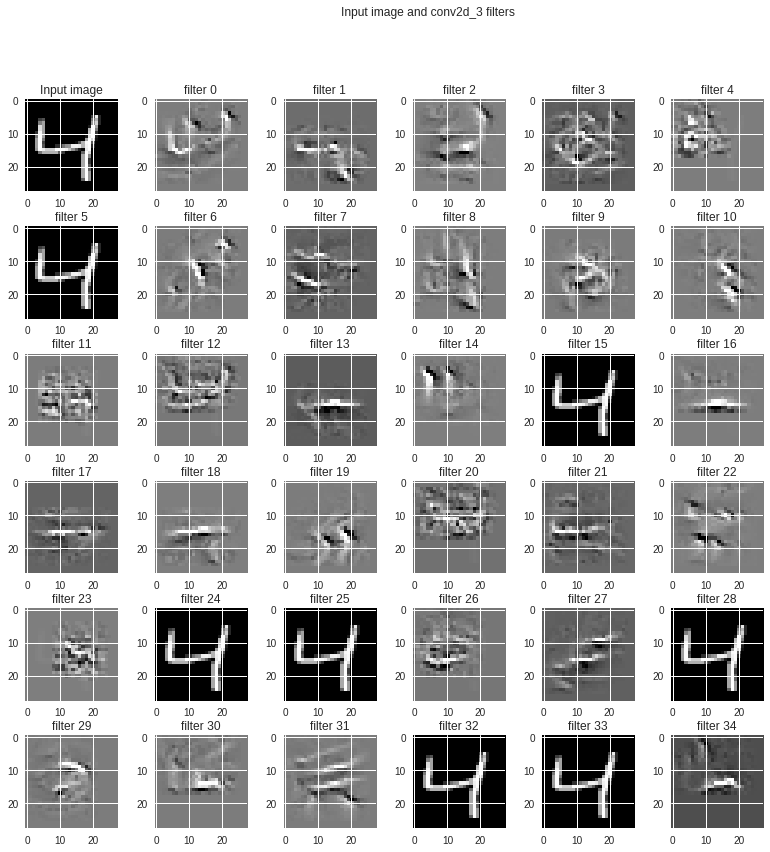

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28,28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()